# ML/AI training Notebook

I searched for some datasets online and found this one that looks simple enough to use for training. The idea is to evolve as we learn new techniques.

# Dataset description:
    

* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


The Housing Data example.

|id|date|price|bed|bath|living|lot|floors|waterfront|view|condition|grade|above|basement|built|renovated|zipcode|lat|long|living15|lot15|
|-:|---:|----:|--:|---:|-----:|-----:|-------:|---:|--------:|----:|----:|-------:|----:|--------:|------:|--:|---:|-------:|----:|---:|
|7129300520|20141013T000000|221900|3|1|1180|5650|1|0|0|3|7|1180|0|1955|0|98178|48|-122|1340|5650
|6414100192|20141209T000000|538000|3|2|2570|7242|2|0|0|3|7|2170|400|1951|1991|98125|48|-122|1690|7639
|5631500400|20150225T000000|180000|2|1|770|10000|1|0|0|3|6|770|0|1933|0|98028|48|-122|2720|8062
|2487200875|20141209T000000|604000|4|3|1960|5000|1|0|0|5|7|1050|910|1965|0|98136|48|-122|1360|5000
|1954400510|20150218T000000|510000|3|2|1680|8080|1|0|0|3|8|1680|0|1987|0|98074|48|-122|1800|7503


In [140]:
# importing libraries
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
#import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

%matplotlib inline

import seaborn as sns

import warnings


In [141]:
# load dataset from .csv, 
# split into X and y and 
# remove columns I don't want or need ['id','date', 'zipcode'] 
dataset = pd.read_csv('kc_house_data.csv', parse_dates=['date'])
y = dataset[['price']]
X = dataset.drop(['price', 'id', ],axis=1)


In [142]:
#x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.25, random_state=0)
X.head(5)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [143]:
feature_names = X.columns.values
print(X.shape)
print(feature_names)

(21613, 19)
['date' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long' 'sqft_living15'
 'sqft_lot15']


In [144]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   bedrooms       21613 non-null  int64         
 2   bathrooms      21613 non-null  float64       
 3   sqft_living    21613 non-null  int64         
 4   sqft_lot       21613 non-null  int64         
 5   floors         21613 non-null  float64       
 6   waterfront     21613 non-null  int64         
 7   view           21613 non-null  int64         
 8   condition      21613 non-null  int64         
 9   grade          21613 non-null  int64         
 10  sqft_above     21613 non-null  int64         
 11  sqft_basement  21613 non-null  int64         
 12  yr_built       21613 non-null  int64         
 13  yr_renovated   21613 non-null  int64         
 14  zipcode        21613 non-null  int64         
 15  lat            2161

In [145]:
import datetime as dt
X['date']=X['date'].map(dt.datetime.toordinal)
X

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,735519,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,735576,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,735654,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,735576,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,735647,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,735374,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,735652,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,735407,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,735614,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [146]:
lr = LinearRegression()

In [147]:
# Naive model with all parameters
lr = LinearRegression()
lr.fit(X,y)
preds = lr.predict(X)
score = round(lr.score(X,y),2)
print(score)

0.7


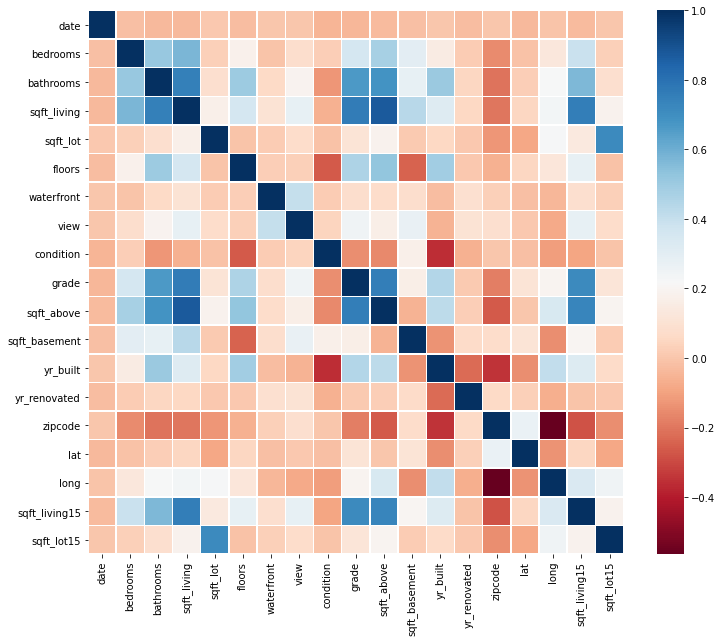

In [148]:
#sns.heatmap(X.corr()) Helmut: replace this line for the two lines below to get better view
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), linewidth=0.5,cmap="RdBu"); 

Observations:
* Checking the colouring of the grade dummies its interesting to observe that there seem to be two clusters in the data. A high-quality cluster which has higher amounts of rooms and sqm and lot and a "low-quality" cluster with less rooms, less sqft etc.
* So: Small houses with less rooms tend to be of worse grade and vice versa
* All the "original" variables correlate rather negatively to each other: same as above: The more rooms, the more lot, the newer the houses even often...

Let's improve the data:

1) yr-renovated 2) sqft_basement 3) check outliers

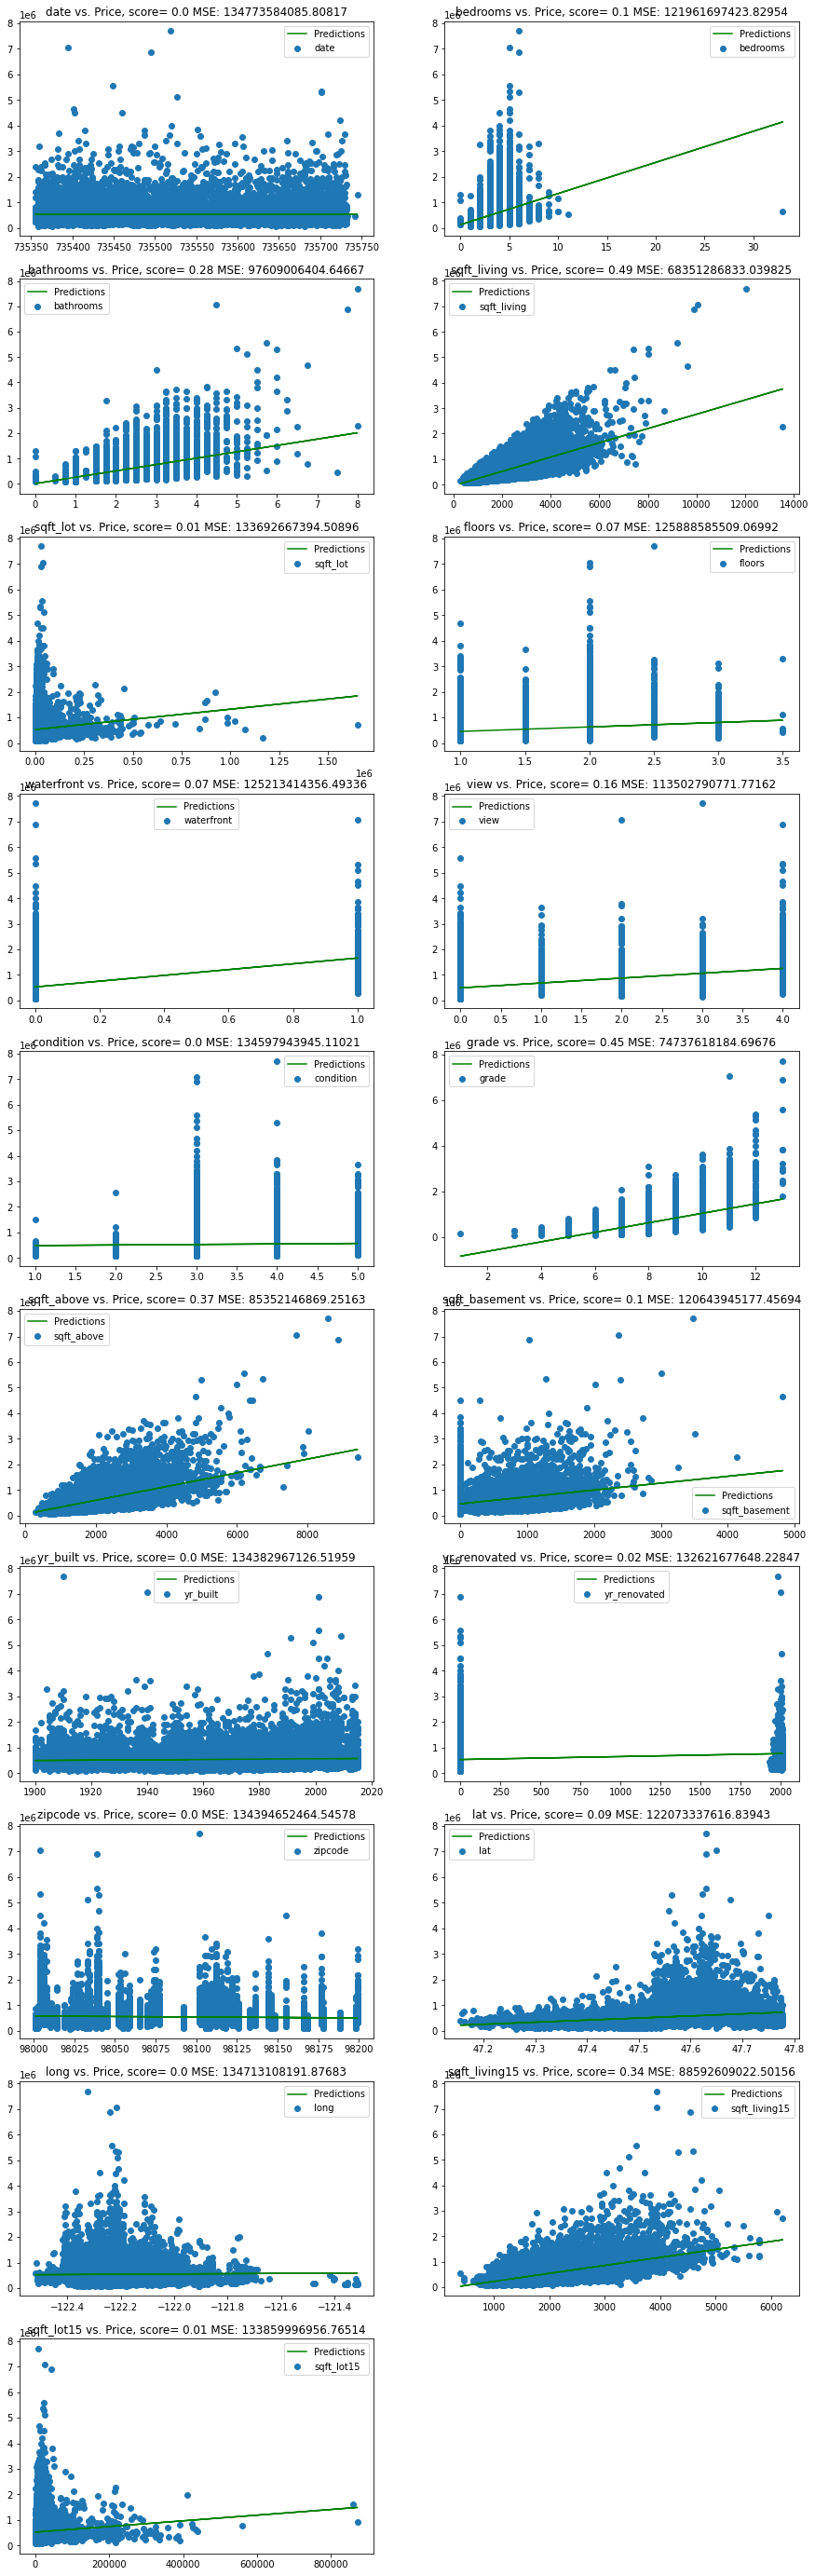

In [149]:
#Iterate over features, fit the model, and plot chart for each one of them including "score".
plt.figure(figsize = (15, 50))
scores = pd.Series( index=feature_names, dtype='float64')
for index, feature in enumerate(feature_names):
    X_input = X[[feature]]
    lr.fit(X_input, y)
    preds = lr.predict(X_input)
    score = round(lr.score(X_input,y),2)
    scores[feature] = score
    err=mean_squared_error(y,preds)
    plt.subplot(10, 2, index+1)
    plt.scatter(X_input, y, label = feature)
    plt.plot(X_input, preds, color = 'green', label = 'Predictions')
    plt.legend()
    plt.title(feature +' vs. Price, score= ' + str(score) + ' MSE: ' +str(err) )
    

In [150]:
print(scores)

date             0.00
bedrooms         0.10
bathrooms        0.28
sqft_living      0.49
sqft_lot         0.01
floors           0.07
waterfront       0.07
view             0.16
condition        0.00
grade            0.45
sqft_above       0.37
sqft_basement    0.10
yr_built         0.00
yr_renovated     0.02
zipcode          0.00
lat              0.09
long             0.00
sqft_living15    0.34
sqft_lot15       0.01
dtype: float64


In [151]:
# Drop lower scored inputs
#X = X.drop(['yr_built', 'date', 'zipcode'], axis=1)
#print("Input features = ", X.columns.values)


In [152]:
# Naive model with all parameters
lr = LinearRegression()
lr.fit(X,y)
preds = lr.predict(X)
score = round(lr.score(X,y),2)
print(score)

0.7


In [153]:
# Naive model with categorical data as dummies
X =  pd.get_dummies(X, columns = ['zipcode','view','condition','grade'],drop_first=True)

In [154]:
lr = LinearRegression()
lr.fit(X,y)
preds = lr.predict(X)
score = round(lr.score(X,y),2)
print(score)

0.84


In [155]:
#To retrieve the intercept:
print(lr.intercept_)
#For retrieving the slope:
print (lr.coef_)

[-1.203081e+08]
[[ 1.16989295e+02 -1.19969960e+04  2.45437969e+04  9.31292588e+01
   2.41681052e-01 -2.98672970e+04  5.70661047e+05  7.26916062e+01
   2.04380354e+01 -2.63606203e+02  2.85808632e+01  2.20611020e+05
  -1.98700101e+05  1.63886235e+01 -1.22100623e-01  1.64580167e+04
  -1.39735410e+04  7.08953955e+05  2.59391649e+05  2.18066302e+05
   2.13449661e+05  2.27137886e+05  1.05789801e+05  5.16681076e+04
   9.95544188e+04  6.56128276e+04  6.52932013e+04 -4.72446348e+04
   1.69696886e+05  1.68044519e+05  4.03330742e+04  2.23392293e+05
   9.08747006e+03  1.11129669e+04 -1.05893408e+04  2.95420922e+05
   1.23733443e+05  6.85385908e+04  1.16145151e+06  4.60675934e+05
   2.22817789e+04  1.65046694e+05  1.91127388e+05  1.74853167e+05
   2.33479795e+04  6.24147957e+04  2.68291565e+04  6.62649731e+04
   1.24984564e+05 -6.39064421e+04  9.15939616e+04  1.55019220e+05
   1.53976468e+05  6.16800903e+04 -2.75252417e+03  4.16713373e+05
   2.55543955e+05  4.01396647e+05  6.21707043e+04  2.5423422

### Error

**Sum of squared error**: $\sum_{i = 1}^n (\hat{y} - y_i)^2$

**Total sum of squared error**: $\sum_{i = 1}^n (\bar{y} - y_i)^2$

**r$^2$** = $1 - \frac{sse}{tss}$

**Mean Squared Error**: $\frac{1}{n} \sum_{i = 1}^n (\hat{y} - y_i)^2$

In [156]:
import math 
err=round(math.sqrt(mean_squared_error(y,preds)))
err

148118

In [157]:
# Train test split
from sklearn.model_selection import train_test_split

# 70% train, 30% test - random state for replication if so wished
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3, random_state=101)

In [158]:
#del(lr)

In [159]:
# Before ridge, lets replicate linear regression from before and test on test-set as baseline
lr.fit(X_train,y_train)

score_train_set = round(lr.score(X_train,y_train),5) 
score_test_set = round(lr.score(X_test,y_test),5)
print("Train set accuracy:",score_train_set)
print("Test set accuracy:", score_test_set)

Train set accuracy: 0.83226
Test set accuracy: 0.84624


In [160]:
pred1=lr.predict(X_test)
round(math.sqrt(mean_squared_error(y_test,pred1))) 

146864

### Ridge

In [161]:
# Now lets do a ridge regression (by design without normalization yet to see the effect)
from sklearn.linear_model import Ridge 

model = Ridge(alpha = 1) #1.0 is the standard setting of sklearn, therefore I left it but wanted to state it directly
model.fit(X_train, y_train) 

score_train_set = round(model.score(X_train,y_train),5) 
score_test_set = round(model.score(X_test,y_test),5)
print("Train Score:",score_train_set)
print("Test Score:", score_test_set)

Train Score: 0.83188
Test Score: 0.84583


### Predict

$$\hat{y} = \beta_0 + X\beta_i$$



In [162]:
pred2=model.predict(X_test)
round(math.sqrt(mean_squared_error(y_test,pred2))) 

147058

### Polynomial Regression


<br />


#### Polynomial Features

$$ y = a + bx_i + cx_i^2 $$



In [163]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2, include_bias=False)
poly.fit_transform(X_test)

array([[7.35606e+05, 2.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [7.35709e+05, 4.00000e+00, 2.25000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [7.35638e+05, 4.00000e+00, 2.50000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [7.35561e+05, 3.00000e+00, 2.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [7.35695e+05, 2.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [7.35502e+05, 4.00000e+00, 3.50000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

### sklearn pipelines

In [165]:
#from sklearn.pipeline import make_pipeline
#poly_model = make_pipeline(PolynomialFeatures(7),
#                           LinearRegression())

In [ ]:
#from sklearn.preprocessing import PolynomialFeatures
#poly = PolynomialFeatures(3, include_bias=False)
#poly.fit_transform(X_test)

In [ ]:
#Taking long, let's delete some feaures
#X = X.drop(['yr_built', 'date', 'waterfront'], axis=1)
#print("Input features = ", X.columns.values)

In [ ]:
# 70% train, 30% test - random state for replication if so wished
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3, random_state=101)

In [ ]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(2),
                           LinearRegression())

#fitting a high order polynomial 
poly_model.fit(X_train, y_train)

pred3 = poly_model.predict(X_test)

poly_model.score(X_test,y_test)

round(math.sqrt(mean_squared_error(y_test,pred3))) 

### Grid Search

In [167]:

from sklearn.model_selection import GridSearchCV, train_test_split


In [168]:
pipe = make_pipeline(StandardScaler(), Ridge())

In [169]:
params = {'ridge__alpha': [0.1, 1.0, 4.0, 10, 100]}

In [170]:
grid = GridSearchCV(pipe, param_grid=params, cv = 5)

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [172]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.1, 1.0, 4.0, 10, 100]})

In [173]:
grid.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [174]:
best = grid.best_estimator_

In [175]:
best.named_steps

{'standardscaler': StandardScaler(), 'ridge': Ridge()}

In [176]:
pred4=grid.predict(X_test)

In [188]:
# Training Score
grid.score(X_train,y_train)

0.8329026916536496

In [189]:
# Test Score
grid.score(X_test,y_test)

0.8462321727366375

In [190]:
# Error
round(math.sqrt(mean_squared_error(y_test,pred4))) 

148709

### Lasso

In [179]:
from sklearn.dummy import DummyRegressor

In [180]:
dum = DummyRegressor()
dum.fit(X_train, y_train)

DummyRegressor()

In [181]:
from sklearn.linear_model import Lasso

In [182]:
lasso = Lasso()
lasso.fit(X_train, y_train)

/Users/adamrob/.local/share/virtualenvs/lab-YJ35TVC8/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177396433569604.25, tolerance: 213573218817.70425
  positive)


Lasso()

In [184]:
lasso.score(X_train,y_train)

0.8328954556131981

In [185]:
lasso.score(X_test,y_test)

0.8461872615756056

In [187]:
pred5=lasso.predict(X_test)
round(math.sqrt(mean_squared_error(y_test,pred5))) 

148731